In [1]:
import pandas as pd
import seaborn as sns

In [2]:
cols=('py_version', 'jf_version', 'implementation', 'function', 'time')
df = pd.read_csv('timedruns.csv', names=cols)
#pivoted = df.pivot_table(index=['function'], columns=['implementation'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'damerau_levenshtein_distance'),
  Text(1, 0, 'hamming_distance'),
  Text(2, 0, 'jaro_similarity'),
  Text(3, 0, 'jaro_winkler_similarity'),
  Text(4, 0, 'levenshtein_distance'),
  Text(5, 0, 'match_rating_codex'),
  Text(6, 0, 'match_rating_comparison'),
  Text(7, 0, 'metaphone'),
  Text(8, 0, 'nysiis'),
  Text(9, 0, 'soundex')])

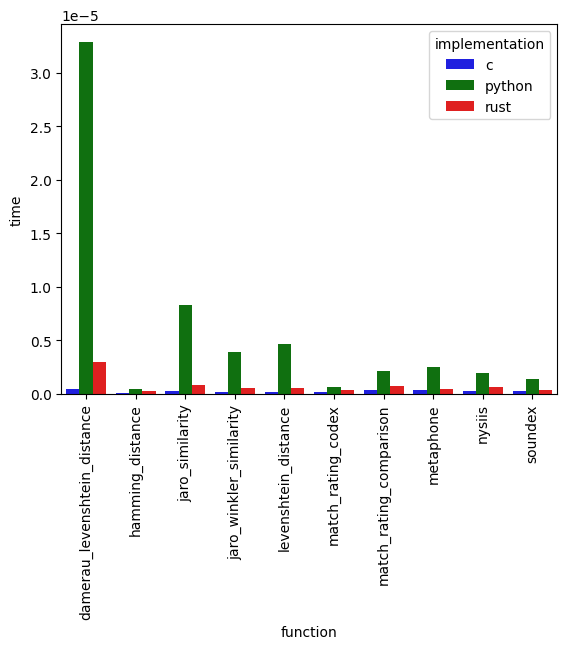

In [3]:
colors = {"python": "green", "c" : "blue", "rust": "red"}

sns.barplot(x='function', y='time', hue='implementation', data=df, palette=colors)
# turn the labels 90 degrees
import matplotlib.pyplot as plt
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'damerau_levenshtein_distance'),
  Text(1, 0, 'hamming_distance'),
  Text(2, 0, 'jaro_similarity'),
  Text(3, 0, 'jaro_winkler_similarity'),
  Text(4, 0, 'levenshtein_distance'),
  Text(5, 0, 'match_rating_codex'),
  Text(6, 0, 'match_rating_comparison'),
  Text(7, 0, 'metaphone'),
  Text(8, 0, 'nysiis'),
  Text(9, 0, 'soundex')])

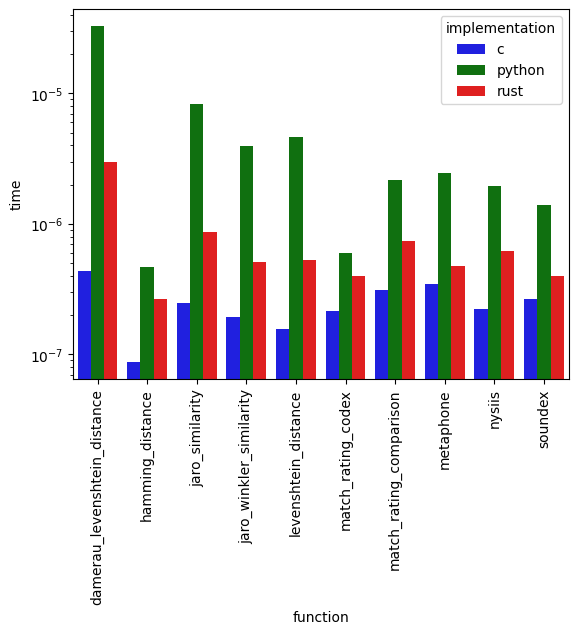

In [4]:
# log scale same plot
sns.barplot(x='function', y='time', hue='implementation', data=df, palette=colors)
plt.yscale('log')
plt.xticks(rotation=90)


In [6]:
pivoted = df.pivot_table(index=['function'], columns=['implementation'], values='time')
pivoted['python/c'] = pivoted['python'] / pivoted['c']
pivoted['rust/c'] = pivoted['python'] / pivoted['rust']
pivoted['rust/python'] = pivoted['rust'] / pivoted['python']
pivoted["c"] *= 100000 # multiply by 100000 to get time in microseconds
pivoted["python"] *= 100000
pivoted["rust"] *= 100000
pivoted


implementation,c,python,rust,python/c,rust/c,rust/python
function,,,,,,
damerau_levenshtein_distance,0.043844,3.289454,0.296865,75.025670,11.080637,0.090248
hamming_distance,0.008722,0.046529,0.026441,5.334908,1.759755,0.568261
jaro_similarity,0.024690,0.831646,0.086272,33.683493,9.639818,0.103736
jaro_winkler_similarity,0.019181,0.392573,0.051057,20.466952,7.688976,0.130056
levenshtein_distance,0.015507,0.465188,0.053257,29.999158,8.734797,0.114485
match_rating_codex,0.021556,0.059770,0.039871,2.772765,1.499091,0.667071
match_rating_comparison,0.031344,0.215691,0.074495,6.881499,2.895385,0.345377
metaphone,0.034497,0.247509,0.047370,7.174855,5.225045,0.191386
nysiis,0.022129,0.195079,0.062024,8.815730,3.145225,0.317942
